نمرین تحویلی svm
مرجان سهرابی

In [1]:
#import pckages
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn import metrics
import seaborn as sn

In [2]:
#import data
from keras.datasets import mnist
(train_X, train_y), (test_X, test_y) = mnist.load_data()
print('X_train: ' + str(train_X.shape))
print('Y_train: ' + str(train_y.shape))
print('X_test: ' + str(test_X.shape))
print('Y_test: ' + str(test_y.shape))

11490434/11490434 [==============================] - 0s 0us/step
X_train: (60000, 28, 28)
Y_train: (60000,)
X_test: (10000, 28, 28)
Y_test: (10000,)


In [4]:
# Reshape the data from 28x28 to 784
train_X = train_X.reshape(train_X.shape[0], -1)
test_X = test_X.reshape(test_X.shape[0], -1)

print('X_train reshaped: ' + str(train_X.shape))
print('X_test reshaped: ' + str(test_X.shape))

X_train reshaped: (60000, 784)
X_test reshaped: (10000, 784)


In [13]:
train_X = pd.DataFrame(train_X)

In [14]:
#Standard the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
train_X=sc.fit_transform(train_X)
test_X=sc.transform(test_X)

In [26]:
import numpy as np
print(np.mean(train_X))
print(np.max(train_X))
print(np.mean(test_X))
print(np.max(test_X))

2.0121022195335068e-19
0.9997834001172083
5.942136449797627e-06
0.9991581645055483


In [25]:
train_X = train_X/245
test_X = test_X/420

In [27]:
# Initialize and train the SVM model
model = SVC(kernel='linear', random_state=0)
model.fit(train_X, train_y)

SVC(kernel='linear', random_state=0)

In [28]:
svc_prediction=model.predict(test_X)
print('svc_prediction: ', svc_prediction)

svc_prediction:  [7 2 1 ... 4 5 6]


In [29]:
# Calculate accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(test_y, svc_prediction)
print('Accuracy: ', accuracy)


Accuracy:  0.892


In [34]:
conf_mat=metrics.confusion_matrix(test_y, svc_prediction)
print('SVC [ kernerl - linear ]')
print('Confusion Matrix : \n', conf_mat)
Accuracy_score=metrics.accuracy_score(test_y, svc_prediction)
print('Accuracy Score : ', Accuracy_score)
print('Accuracy in Percentage : ', int(Accuracy_score*100),'%')
print(classification_report(svc_prediction,test_y))

SVC [ kernerl - linear ]
Confusion Matrix : 
 [[ 891    0    2    3    2   65    8    2    7    0]
 [   0 1070    1    9    1    3    4    0   47    0]
 [   8    0  877   23   19    6    8    8   80    3]
 [   1    0   17  894    0   32    1   10   41   14]
 [   1    1    5    0  879    4    5    2   13   72]
 [   2    2    4   35    8  794   13    3   22    9]
 [   4    2   14    0   17   46  863    0   12    0]
 [   1   18   13    2   18    1    0  848   23  104]
 [   3    1    3   16    8   41    4    4  874   20]
 [   4    4    3   12   26    8    0    4   18  930]]
Accuracy Score :  0.892
Accuracy in Percentage :  89 %
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       915
           1       0.94      0.97      0.96      1098
           2       0.85      0.93      0.89       939
           3       0.89      0.90      0.89       994
           4       0.90      0.90      0.90       978
           5       0.89      0.79      0.84

 ملاحظه می‌شود که میزان صحت مدل تقریبا 90 درصد است. همچنین با توجه به ماتریس در هم ریختگی میتوان هر یک از معیارهای ارزیابی را بررسی کرد. مشاهده میشود که حجم زیادی از داده ها روی قطر اصلی قرار دارد بنابراین درهر کلاس برآورد بسیار خوبی درست انجام شده است.

[Text(0.5, 1.0, 'SVC [linear]')]

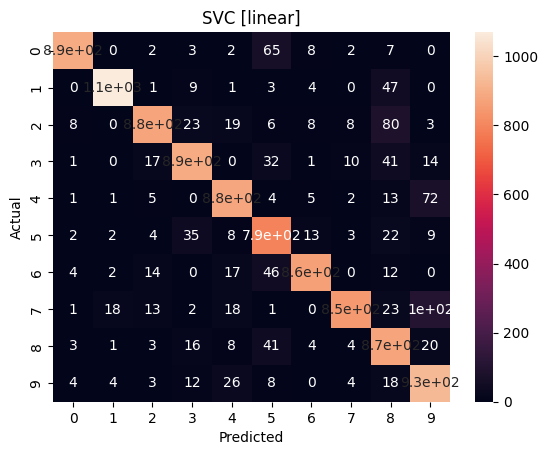

In [35]:
conf_mat=pd.crosstab(test_y, svc_prediction, rownames=['Actual'],
colnames=['Predicted'])
sn.heatmap(conf_mat, annot=True).set(title='SVC [linear]')

In [38]:
# Plot ROC curve
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

test_y_bin = label_binarize(test_y, classes=np.arange(10))
y_score = model.decision_function(test_X)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(10):
    fpr[i], tpr[i], _ = roc_curve(test_y_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

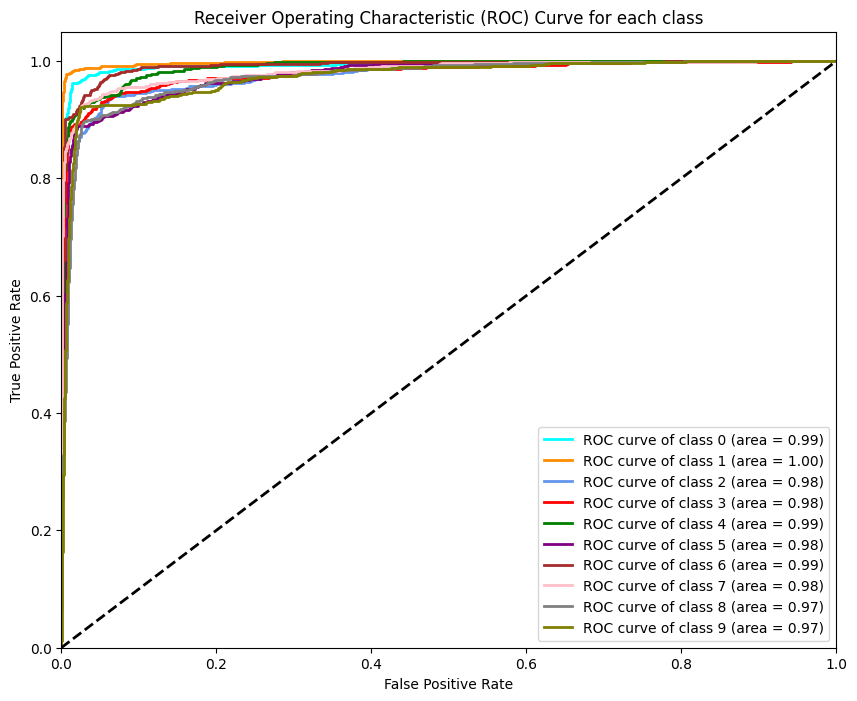

In [44]:
# Plot all ROC curves
import matplotlib.pyplot as plt
from itertools import cycle

# Plot all ROC curves
plt.figure(figsize=(10, 8))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'red', 'green', 'purple', 'brown', 'pink', 'gray', 'olive'])
for i, color in zip(range(10), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for each class')
plt.legend(loc="lower right")
plt.show()

ملاحظه میشود مقدار AUC بیشتر از 0.5 است.